1/5
2/5
4/5
2/5
4/5
2/5
4/5
2/5
4/5


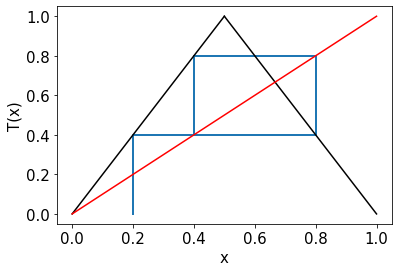

In [2]:
# Programs 14a: Graphical iteration of the tent map.
# See Figure 14.7(a).

from sympy import Rational
import numpy as np
import matplotlib.pyplot as plt

x = Rational(1, 5)  # Initial value
inputs = np.array([x])
outputs = np.array([0])
print(x)

for i in range(2, 10):
    inputs = np.append(inputs, x)
    inputs = np.append(inputs, x)
    outputs = np.append(outputs, x)
    if x < Rational(1, 2):
        x = 2 * x
    elif x > Rational(1, 2):
        x = 2 - 2 * x
    outputs = np.append(outputs, x)
    print(x)

plt.plot(inputs, outputs, lw=2)

# Plot the tent function and line y=x.
X1 = np.linspace(0, 0.5, 100, endpoint=True)
X2 = np.linspace(0.5, 1, 100, endpoint=True)
X = np.linspace(0, 1, 200, endpoint=True)
plt.plot(X1, 2*X1, 'k-')
plt.plot(X2, 2*(1-X2), 'k-')
plt.plot(X, X, 'r-')
plt.xlabel('x', fontsize=15)
plt.ylabel('T(x)', fontsize=15)
plt.tick_params(labelsize=15)

plt.show()


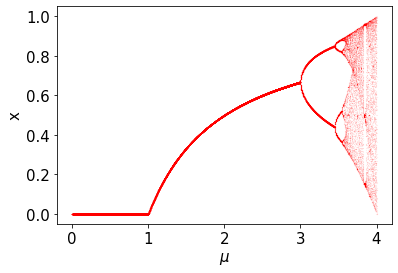

In [3]:
# Program 14b: Bifurcation diagram of the logistic map.
# See Figures 14.15 and 14.16.

import numpy as np
import matplotlib.pyplot as plt

def f(x, r):
    return r * x * (1 - x)

ys = []
rs = np.linspace(0, 4, 2000)
#rs = np.linspace(3.5, 4, 2000) # For Figure 14.16.
for r in rs:
    x = 0.1
    for i in range(500):
        x = f(x, r)
    for i in range(50):
        x = f(x, r)
        ys.append([r, x])

ys = np.array(ys)

plt.plot(ys[:, 0], ys[:, 1], 'r.', markersize=0.05)
plt.xlabel('$\mu$', fontsize=15)
plt.ylabel('x', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()

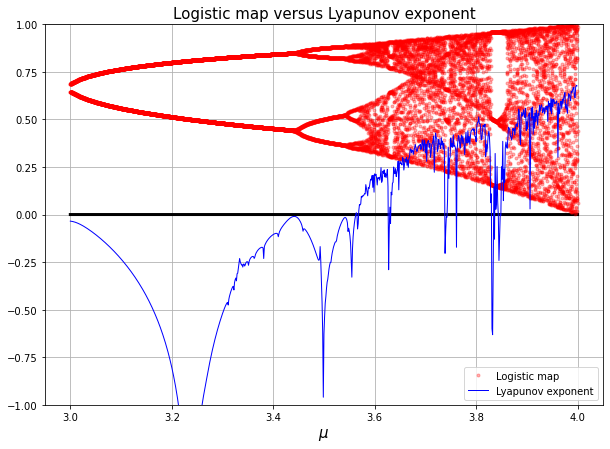

In [4]:
# Program 14c: Lyapunov exponents of the logistic map.
# See Figure 14.18.

import numpy as np
import matplotlib.pyplot as plt

num_points = 16000
result = []
lambdas = []
maps = []
xmin, xmax = 3, 4
mult = (xmax - xmin) * num_points

mu_values = np.arange(xmin, xmax, 20/num_points)

for r in mu_values:
    x = 0.1
    result = []
    for t in range(100):
        x = r * x * (1 - x)
        result.append(np.log(abs(r - 2*r*x)))
    lambdas.append(np.mean(result))
    # Ignore first 100 iterates.
    for t in range(20):
        x = r * x * (1 - x)
        maps.append(x)

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1,1,1)

xticks = np.linspace(xmin, xmax, mult)
zero = [0] * mult
ax1.plot(xticks, zero, 'k-', linewidth=3)
ax1.plot(xticks, maps,'r.', alpha = 0.3, label='Logistic map')
ax1.set_xlabel('r')
ax1.plot(mu_values, lambdas, 'b-', linewidth=1, label='Lyapunov exponent')
ax1.grid('on')
ax1.set_ylim(-1, 1)
ax1.set_xlabel('$\mu$', fontsize=15)
ax1.legend(loc='best')
ax1.set_title('Logistic map versus Lyapunov exponent', fontsize=15)

plt.show()

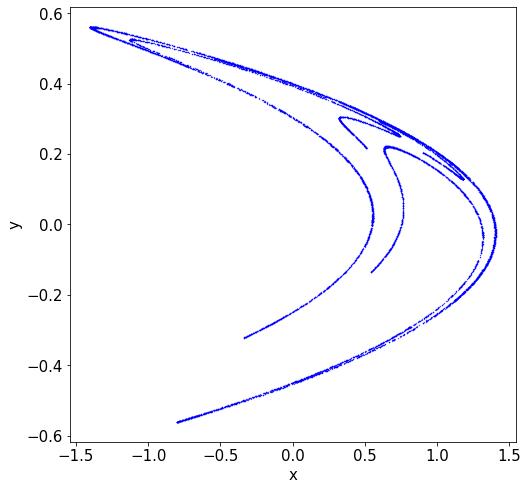

In [5]:
# Program 14d: Iteration of the Henon Map.
# See Figure 14.23.

import matplotlib.pyplot as plt

# Parameters
a = 1.2  # Set a=1 to get Figure 14.23(a)
b = 0.4
num_iterations = 10000

def henon(X):
    x,y=X
    xn=1-a*x*x+y
    yn=b*x
    return xn,yn

# Ignore the first 100 iterates
X0 = [(1 - b) / 2, (1 - b) / 2]
X, Y = [], []
for i in range(100):
    xn, yn = henon(X0)
    X, Y = X + [xn], Y + [yn]
    X0 = [xn, yn]

X, Y = [], []
for i in range(num_iterations):
    xn, yn = henon(X0)
    X, Y = X + [xn], Y + [yn]
    X0 = [xn, yn]

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X, Y, color='blue', s=0.1)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()